In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.optimizers import Adam

In [46]:
curencceies = ['BTC-USD', 'ETH-USD', 'LTC-USD', 'BCH-USD', 'BNB-USD', 'SOL-USD', 'XRP-USD', 'ADA-USD']
data = yf.download(curencceies , period='3y')
data.tail()

[*********************100%%**********************]  8 of 8 completed


Price      Adj Close                                                     \
Ticker       ADA-USD     BCH-USD     BNB-USD       BTC-USD      ETH-USD   
Date                                                                      
2024-03-03  0.728238  469.362793  414.381073  63167.371094  3490.993652   
2024-03-04  0.771294  470.423157  419.035431  68330.414062  3630.433838   
2024-03-05  0.693490  401.490845  394.661743  63801.199219  3554.964600   
2024-03-06  0.733821  415.128448  429.011963  66106.804688  3819.226318   
2024-03-07  0.736857  422.657440  446.121429  67071.835938  3812.898193   

Price                                           Close              ...  \
Ticker        LTC-USD     SOL-USD   XRP-USD   ADA-USD     BCH-USD  ...   
Date                                                               ...   
2024-03-03  90.668350  130.450867  0.627072  0.728238  469.362793  ...   
2024-03-04  88.935455  133.194580  0.650133  0.771294  470.423157  ...   
2024-03-05  82.041199  125.706711  0.592901  0.693490  401.490845  ...   
2024-03-06  85.829971  130.742020  0.612253  0.733821  415.128448  ...   
2024-03-07  86.450233  146.643463  0.623644  0.736857  422.657440  ...   

Price             Open                Volume                          \
Ticker         SOL-USD   XRP-USD     ADA-USD     BCH-USD     BNB-USD   
Date                                                                   
2024-03-03  129.793381  0.644846   907825948  2172425729  1810575392   
2024-03-04  130.423233  0.627168  1639201127  1502795369  2111212949   
2024-03-05  133.159363  0.649815  2145482141  1415399701  3319029162   
2024-03-06  125.699211  0.592880  1221400314   799980731  3281109608   
2024-03-07  130.704865  0.612288   967846464   675600768  2632216576   

Price                                                                      
Ticker           BTC-USD      ETH-USD     LTC-USD     SOL-USD     XRP-USD  
Date                                                                       
2024-03-03   26253811450  13643324467   707371775  2875614168  2060336711  
2024-03-04   70670471105  26772963830   830931633  4429758300  3629204334  
2024-03-05  102802940877  47706899137  1367572503  8980294607  5014326043  
2024-03-06   68750229073  34938642613   742784629  5146680159  2755184860  
2024-03-07   49559769088  23294879744   565909376  6636323840  2498579200  

[5 rows x 48 columns]

In [47]:
d = pd.DataFrame()
for i in curencceies:
  d[ i + '_Adj Close'] = data['Adj Close'][i]
data = d
data.tail()

,BTC-USD_Adj Close,ETH-USD_Adj Close,LTC-USD_Adj Close,BCH-USD_Adj Close,BNB-USD_Adj Close,SOL-USD_Adj Close,XRP-USD_Adj Close,ADA-USD_Adj Close
Date,,,,,,,,
2024-03-03,63167.371094,3490.993652,90.668350,469.362793,414.381073,130.450867,0.627072,0.728238
2024-03-04,68330.414062,3630.433838,88.935455,470.423157,419.035431,133.194580,0.650133,0.771294
2024-03-05,63801.199219,3554.964600,82.041199,401.490845,394.661743,125.706711,0.592901,0.693490
2024-03-06,66106.804688,3819.226318,85.829971,415.128448,429.011963,130.742020,0.612253,0.733821
2024-03-07,67071.835938,3812.898193,86.450233,422.657440,446.121429,146.643463,0.623644,0.736857


In [48]:
y = data['BTC-USD_Adj Close']
data.drop(columns=['BTC-USD_Adj Close'],axis=1, inplace=True)

In [49]:
data = data.shift(1).fillna(method='bfill')
data.tail()

,ETH-USD_Adj Close,LTC-USD_Adj Close,BCH-USD_Adj Close,BNB-USD_Adj Close,SOL-USD_Adj Close,XRP-USD_Adj Close,ADA-USD_Adj Close
Date,,,,,,,
2024-03-03,3422.049805,94.419029,500.806061,410.985870,129.700180,0.644851,0.740928
2024-03-04,3490.993652,90.668350,469.362793,414.381073,130.450867,0.627072,0.728238
2024-03-05,3630.433838,88.935455,470.423157,419.035431,133.194580,0.650133,0.771294
2024-03-06,3554.964600,82.041199,401.490845,394.661743,125.706711,0.592901,0.693490
2024-03-07,3819.226318,85.829971,415.128448,429.011963,130.742020,0.612253,0.733821


In [50]:
data = pd.concat((data, y), axis=1)
data.tail()

,ETH-USD_Adj Close,LTC-USD_Adj Close,BCH-USD_Adj Close,BNB-USD_Adj Close,SOL-USD_Adj Close,XRP-USD_Adj Close,ADA-USD_Adj Close,BTC-USD_Adj Close
Date,,,,,,,,
2024-03-03,3422.049805,94.419029,500.806061,410.985870,129.700180,0.644851,0.740928,63167.371094
2024-03-04,3490.993652,90.668350,469.362793,414.381073,130.450867,0.627072,0.728238,68330.414062
2024-03-05,3630.433838,88.935455,470.423157,419.035431,133.194580,0.650133,0.771294,63801.199219
2024-03-06,3554.964600,82.041199,401.490845,394.661743,125.706711,0.592901,0.693490,66106.804688
2024-03-07,3819.226318,85.829971,415.128448,429.011963,130.742020,0.612253,0.733821,67071.835938


In [51]:
data.head()

,ETH-USD_Adj Close,LTC-USD_Adj Close,BCH-USD_Adj Close,BNB-USD_Adj Close,SOL-USD_Adj Close,XRP-USD_Adj Close,ADA-USD_Adj Close,BTC-USD_Adj Close
Date,,,,,,,,
2021-03-07,1723.153809,190.759109,516.173523,240.179214,13.877732,0.466867,1.133367,51206.691406
2021-03-08,1723.153809,190.759109,516.173523,240.179214,13.877732,0.466867,1.133367,52246.523438
2021-03-09,1834.727905,191.927689,528.996887,240.318665,13.602188,0.473597,1.118053,54824.117188
2021-03-10,1868.048828,203.637863,545.026001,293.463226,14.846311,0.485988,1.195161,56008.550781
2021-03-11,1799.166260,200.516861,546.839600,279.358032,14.231084,0.463166,1.135003,57805.121094


In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1097 entries, 2021-03-07 to 2024-03-07
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BTC-USD_Adj Close  1097 non-null   float64
 1   ETH-USD_Adj Close  1097 non-null   float64
 2   LTC-USD_Adj Close  1097 non-null   float64
 3   BCH-USD_Adj Close  1097 non-null   float64
 4   BNB-USD_Adj Close  1097 non-null   float64
 5   SOL-USD_Adj Close  1097 non-null   float64
 6   XRP-USD_Adj Close  1097 non-null   float64
 7   ADA-USD_Adj Close  1097 non-null   float64
dtypes: float64(8)
memory usage: 77.1 KB


In [394]:
data.isna().sum()

BTC-USD_Adj Close    0
ETH-USD_Adj Close    0
LTC-USD_Adj Close    0
BCH-USD_Adj Close    0
BNB-USD_Adj Close    0
SOL-USD_Adj Close    0
XRP-USD_Adj Close    0
ADA-USD_Adj Close    0
dtype: int64

In [52]:
lags = 3
y_lags = pd.concat(
        {
            f'y_lag_{i}': data['BTC-USD_Adj Close'].shift(-1 * i)
            for i in range(1, lags + 1)
        },
        axis=1)
data = pd.concat([data, y_lags], axis=1).fillna(method='bfill')
data.tail()

,ETH-USD_Adj Close,LTC-USD_Adj Close,BCH-USD_Adj Close,BNB-USD_Adj Close,SOL-USD_Adj Close,XRP-USD_Adj Close,ADA-USD_Adj Close,BTC-USD_Adj Close,y_lag_1,y_lag_2,y_lag_3
Date,,,,,,,,,,,
2024-03-03,3422.049805,94.419029,500.806061,410.985870,129.700180,0.644851,0.740928,63167.371094,68330.414062,63801.199219,66106.804688
2024-03-04,3490.993652,90.668350,469.362793,414.381073,130.450867,0.627072,0.728238,68330.414062,63801.199219,66106.804688,67071.835938
2024-03-05,3630.433838,88.935455,470.423157,419.035431,133.194580,0.650133,0.771294,63801.199219,66106.804688,67071.835938,NaN
2024-03-06,3554.964600,82.041199,401.490845,394.661743,125.706711,0.592901,0.693490,66106.804688,67071.835938,NaN,NaN
2024-03-07,3819.226318,85.829971,415.128448,429.011963,130.742020,0.612253,0.733821,67071.835938,NaN,NaN,NaN


# simple RNN

In [38]:
X = data.drop(columns=['BTC-USD_Adj Close'],axis=1)
X.head()

,ETH-USD_Adj Close,LTC-USD_Adj Close,BCH-USD_Adj Close,BNB-USD_Adj Close,SOL-USD_Adj Close,XRP-USD_Adj Close,ADA-USD_Adj Close,y_lag_1
Date,,,,,,,,
2021-03-07,1723.153809,190.759109,516.173523,240.179214,13.877732,0.466867,1.133367,51206.691406
2021-03-08,1723.153809,190.759109,516.173523,240.179214,13.877732,0.466867,1.133367,51206.691406
2021-03-09,1834.727905,191.927689,528.996887,240.318665,13.602188,0.473597,1.118053,52246.523438
2021-03-10,1868.048828,203.637863,545.026001,293.463226,14.846311,0.485988,1.195161,54824.117188
2021-03-11,1799.166260,200.516861,546.839600,279.358032,14.231084,0.463166,1.135003,56008.550781


In [39]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [27]:
y_train

Date
2021-03-07    51206.691406
2021-03-08    52246.523438
2021-03-09    54824.117188
2021-03-10    56008.550781
2021-03-11    57805.121094
                  ...     
2023-05-11    27000.789062
2023-05-12    26804.990234
2023-05-13    26784.078125
2023-05-14    26930.638672
2023-05-15    27192.693359
Name: BTC-USD_Adj Close, Length: 800, dtype: float64

In [40]:
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values


y_train.shape, X_train.shape

((800,), (800, 8))

In [41]:
model = Sequential()
model.add(SimpleRNN(units=64, activation='tanh'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.01), )

In [294]:
# XT, yT = [], []
# for i in range(len(X_train) - 1):
#     d = i + 1
#     XT.append(X_train[i:d,])
#     yT.append(X_train[d])

In [295]:
# Xt, yt = [], []
# for i in range(len(X_test) - 1):
#     d = i + 1
#     Xt.append(X_test[i:d,])
#     yt.append(X_test[d])

In [296]:
# XT = np.array(XT)
# Xt = np.array(Xt)

In [297]:
# XT.shape

In [298]:
# XT[1]

In [299]:
# yT[0]

In [300]:
# XT = np.reshape(XT, (XT.shape[0], XT.shape[1], 1))
# Xt = np.reshape(Xt, (Xt.shape[0], Xt.shape[1], 1))
# XT.shape

In [301]:
# yT = np.array(yT)
# yt = np.array(yt)

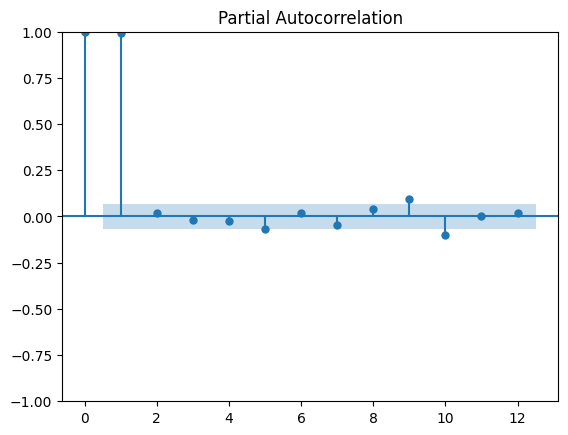

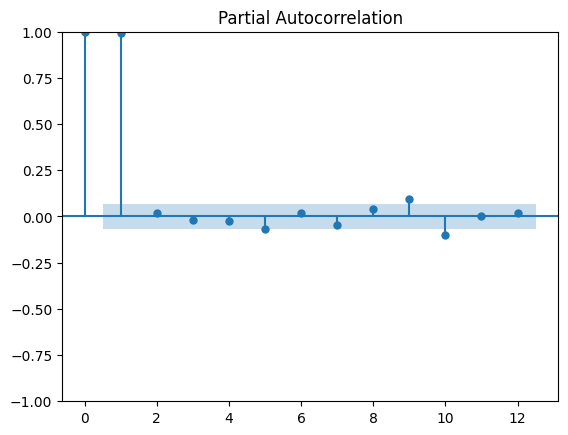

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(y_train, lags = 12)

## correlation

In [303]:
def plot_scores(scores, title="Scores"):
    f, ax = plt.subplots(figsize=(15, 20))
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks, fontsize=20)
    plt.title(title)

In [304]:
data = pd.DataFrame(np.concatenate( [XT.reshape((XT.shape[0], XT.shape[1])), yT.reshape((yT.shape[0], 1)) ], axis=1))
data.head()

,0,1
0,457.334015,424.440002
1,424.440002,394.795990
2,394.795990,408.903992
3,408.903992,398.821014
4,398.821014,402.152008


In [305]:
# corr = data.corr()
# corr_scores = corr[1].sort_values(ascending=False)
# plot_scores(corr_scores, "Correlation Scores")

In [357]:
y_train.shape

(800,)

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape

(800, 8, 1)

In [43]:
history = model.fit(X_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 35302.3438
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 35031.0508
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 34412.2305
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 33397.1836
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 31974.7930
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 30145.7402
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 27914.5332
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 25287.0605
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 22269.6270
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 18931.3828
Epoch 11/100
40/40 [==============================] - 0s 2ms/step - loss: 16082.3779
Epoch 12/100
40/40 [==============================] - 0s 2ms/step - loss: 

In [367]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 9532.0225


9532.0224609375

In [369]:
XTPredicted = model.predict(X_train)
XtPredicted = model.predict(X_test)
XFinal = np.concatenate([XTPredicted, XtPredicted], axis=0)

10/10 [==============================] - 0s 1ms/step


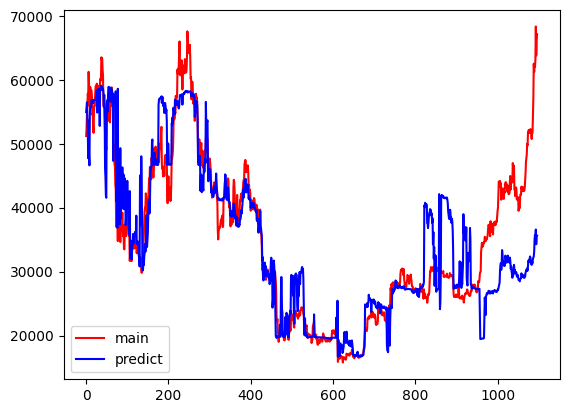

In [371]:
plt.plot(np.concatenate((y_train, y_test), axis=0), color='red', label='main')
plt.plot(XFinal, color='blue', label='predict')
plt.legend()
plt.show()